# Red Inicial


## Imports


In [1]:
from __future__ import annotations

from itertools import product
from time import perf_counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from custom_env.actions import Acciones
from custom_env.router_env import RouterEnv
from gymnasium import make
from gymnasium.utils.env_checker import check_env
from pandas import DataFrame, Series
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.logger import Logger, configure
from stable_baselines3.common.monitor import Monitor

In [2]:
name = "Example"
tmp_path = "./train_log/"
env_id = "RouterEnv-v0"

progress_bar = True
if progress_bar:
    import rich
    import tqdm

## Clases y Funciones


In [3]:

"""

class PacketAttack(Enum):
    @staticmethod
    def new_set(description, weight, class_ref):
        return {
            "Description": description,
            "weight": weight,
            "class": class_ref
        }

    @staticmethod
    def not_implemented():
        raise NotImplementedError(f"Class not implemented")
    @classmethod
    @cache
    def weights(cls):
        attack_weights = []
        for attack in PacketAttack:
            attack_weights.append(attack.value["weight"])
        return np.array(attack_weights)

    # ----ENUM VALUES----
    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)
    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)


gen = DOS_Packet_Generator(step_dur=1e-6,seed=1)




print(len(gen.generate_packets()))

"""

'\n\nclass PacketAttack(Enum):\n    @staticmethod\n    def new_set(description, weight, class_ref):\n        return {\n            "Description": description,\n            "weight": weight,\n            "class": class_ref\n        }\n\n    @staticmethod\n    def not_implemented():\n        raise NotImplementedError(f"Class not implemented")\n    @classmethod\n    @cache\n    def weights(cls):\n        attack_weights = []\n        for attack in PacketAttack:\n            attack_weights.append(attack.value["weight"])\n        return np.array(attack_weights)\n\n    # ----ENUM VALUES----\n    DOS = new_set("Denial of Service", 1.0, DOS_Packet_Generator)\n    DDOS = new_set("Distributed Denial of Service", 2.0, DDOS_Packet_Generator)\n\n\ngen = DOS_Packet_Generator(step_dur=1e-6,seed=1)\n\n\n\n\nprint(len(gen.generate_packets()))\n\n'

In [4]:
tiempo_global: float = 0.0
iteraciones = 0
# Decaorador auxiliar para poder medir el tiempo de las funciones


def medir_tiempo(activado=False):
    def fun(funcion):
        def wrapper(*args, **kwargs):
            if not activado:
                return funcion(*args, **kwargs)
            fun_tiempo = perf_counter
            inicio: float = fun_tiempo()
            resultado = funcion(*args, **kwargs)
            tiempo_total: float = fun_tiempo() - inicio
            global tiempo_global, iteraciones
            medida = 1e6
            t: float = tiempo_total*medida
            tiempo_global += t
            iteraciones += 1
            print(f"Tiempo de ejecución de {
                funcion.__name__}: {t:.2f} micro-segundos")
            return resultado
        return wrapper
    return fun

## Entrenamiento


In [26]:

seed = None
env: RouterEnv = make(env_id, seed=seed)
# env = RouterEnv(seed=None)
check_env(env)

new_logger: Logger = configure(tmp_path, ["stdout", "csv"])
env = Monitor(env, tmp_path)


model: PPO = PPO("MlpPolicy", env,
                 verbose=True)


"""
eval_callback = EvalCallback(
    env,  # Entorno de evaluación
    best_model_save_path="./logs/best_model",  # Ruta para guardar el mejor modelo
    log_path="./logs",  # Ruta para guardar estadísticas
    eval_freq=10000,  # Frecuencia de evaluación (en pasos)
    deterministic=True,
    render=False,
)
, callback=eval_callback
"""
"""
ep_info = a.ep_info_buffer
print(a.ep_info_buffer)
if ep_info is not None and len(ep_info) > 0:
    rew=ep_info[0]["r"]
    print(rew)
    saved= PPO.load("Example")
    print(ep_info.pop())
"""


model.set_logger(new_logger)
try:
    model.learn(total_timesteps=int(1e5),
                progress_bar=progress_bar)
except KeyboardInterrupt:
    print("Entrenamiento interrumpido")


g: str = input("¿Desea guardarlo? (s/n) ")
if g.lower() == "s":
    model.save(name)
    print("Modelo guardado")

Logging to ./train_log/


Output()

Using cpu device
Wrapping the env in a DummyVecEnv.


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 400      |
|    ep_rew_mean     | 92.8     |
| time/              |          |
|    fps             | 640      |
|    iterations      | 1        |
|    time_elapsed    | 3        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 144         |
| time/                   |             |
|    fps                  | 562         |
|    iterations           | 2           |
|    time_elapsed         | 7           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011687763 |
|    clip_fraction        | 0.0268      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.69       |
|    explained_variance   | -0.00152    |
|    learning_rate        | 0.0003      |
|    loss                 | 9.72        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0131     |
|    value_loss           | 83          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 184         |
| time/                   |             |
|    fps                  | 532         |
|    iterations           | 3           |
|    time_elapsed         | 11          |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.026313115 |
|    clip_fraction        | 0.275       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.636      |
|    explained_variance   | 0.517       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.95        |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0287     |
|    value_loss           | 18.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 204         |
| time/                   |             |
|    fps                  | 539         |
|    iterations           | 4           |
|    time_elapsed         | 15          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.014381268 |
|    clip_fraction        | 0.0586      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.609      |
|    explained_variance   | -0.178      |
|    learning_rate        | 0.0003      |
|    loss                 | 14          |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00335    |
|    value_loss           | 73          |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 227         |
| time/                   |             |
|    fps                  | 536         |
|    iterations           | 5           |
|    time_elapsed         | 19          |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.013300294 |
|    clip_fraction        | 0.0971      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.547      |
|    explained_variance   | 0.115       |
|    learning_rate        | 0.0003      |
|    loss                 | 4.73        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00687    |
|    value_loss           | 28.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 240         |
| time/                   |             |
|    fps                  | 523         |
|    iterations           | 6           |
|    time_elapsed         | 23          |
|    total_timesteps      | 12288       |
| train/                  |             |
|    approx_kl            | 0.009130392 |
|    clip_fraction        | 0.0537      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.496      |
|    explained_variance   | -0.189      |
|    learning_rate        | 0.0003      |
|    loss                 | 20          |
|    n_updates            | 50          |
|    policy_gradient_loss | -0.00233    |
|    value_loss           | 66.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 251         |
| time/                   |             |
|    fps                  | 515         |
|    iterations           | 7           |
|    time_elapsed         | 27          |
|    total_timesteps      | 14336       |
| train/                  |             |
|    approx_kl            | 0.005440831 |
|    clip_fraction        | 0.0484      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.456      |
|    explained_variance   | 0.00815     |
|    learning_rate        | 0.0003      |
|    loss                 | 22.1        |
|    n_updates            | 60          |
|    policy_gradient_loss | -0.00403    |
|    value_loss           | 42.2        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 252         |
| time/                   |             |
|    fps                  | 502         |
|    iterations           | 8           |
|    time_elapsed         | 32          |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.007897372 |
|    clip_fraction        | 0.0834      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.432      |
|    explained_variance   | 0.0027      |
|    learning_rate        | 0.0003      |
|    loss                 | 37.4        |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.00471    |
|    value_loss           | 61.1        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 265         |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 9           |
|    time_elapsed         | 36          |
|    total_timesteps      | 18432       |
| train/                  |             |
|    approx_kl            | 0.014591994 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.448      |
|    explained_variance   | 0.0156      |
|    learning_rate        | 0.0003      |
|    loss                 | 34.5        |
|    n_updates            | 80          |
|    policy_gradient_loss | -0.0174     |
|    value_loss           | 122         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 273         |
| time/                   |             |
|    fps                  | 498         |
|    iterations           | 10          |
|    time_elapsed         | 41          |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.009425191 |
|    clip_fraction        | 0.0408      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.434      |
|    explained_variance   | -0.0696     |
|    learning_rate        | 0.0003      |
|    loss                 | 49.3        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.00202    |
|    value_loss           | 121         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 282          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 11           |
|    time_elapsed         | 45           |
|    total_timesteps      | 22528        |
| train/                  |              |
|    approx_kl            | 0.0029560141 |
|    clip_fraction        | 0.0433       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.266       |
|    explained_variance   | 0.00275      |
|    learning_rate        | 0.0003       |
|    loss                 | 34           |
|    n_updates            | 100          |
|    policy_gradient_loss | -0.00699     |
|    value_loss           | 69.1         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 299          |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 12           |
|    time_elapsed         | 49           |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0012239274 |
|    clip_fraction        | 0.0163       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.202       |
|    explained_variance   | 0.0104       |
|    learning_rate        | 0.0003       |
|    loss                 | 57.8         |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.00263     |
|    value_loss           | 76.8         |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 316         |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 13          |
|    time_elapsed         | 53          |
|    total_timesteps      | 26624       |
| train/                  |             |
|    approx_kl            | 0.021928526 |
|    clip_fraction        | 0.0751      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.313      |
|    explained_variance   | -0.628      |
|    learning_rate        | 0.0003      |
|    loss                 | 78.3        |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.00444    |
|    value_loss           | 174         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 329          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 14           |
|    time_elapsed         | 57           |
|    total_timesteps      | 28672        |
| train/                  |              |
|    approx_kl            | 0.0009513413 |
|    clip_fraction        | 0.00293      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.318       |
|    explained_variance   | -0.000985    |
|    learning_rate        | 0.0003       |
|    loss                 | 173          |
|    n_updates            | 130          |
|    policy_gradient_loss | 0.000535     |
|    value_loss           | 475          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 347          |
| time/                   |              |
|    fps                  | 498          |
|    iterations           | 15           |
|    time_elapsed         | 61           |
|    total_timesteps      | 30720        |
| train/                  |              |
|    approx_kl            | 0.0031521444 |
|    clip_fraction        | 0.0369       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.334       |
|    explained_variance   | -0.000244    |
|    learning_rate        | 0.0003       |
|    loss                 | 310          |
|    n_updates            | 140          |
|    policy_gradient_loss | -0.000728    |
|    value_loss           | 668          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 357          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 16           |
|    time_elapsed         | 65           |
|    total_timesteps      | 32768        |
| train/                  |              |
|    approx_kl            | 0.0006806738 |
|    clip_fraction        | 0.00557      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.329       |
|    explained_variance   | -0.000106    |
|    learning_rate        | 0.0003       |
|    loss                 | 393          |
|    n_updates            | 150          |
|    policy_gradient_loss | -0.000393    |
|    value_loss           | 882          |
------------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 368           |
| time/                   |               |
|    fps                  | 502           |
|    iterations           | 17            |
|    time_elapsed         | 69            |
|    total_timesteps      | 34816         |
| train/                  |               |
|    approx_kl            | 0.00043739274 |
|    clip_fraction        | 0.0212        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.313        |
|    explained_variance   | -3.85e-05     |
|    learning_rate        | 0.0003        |
|    loss                 | 224           |
|    n_updates            | 160           |
|    policy_gradient_loss | -4.52e-06     |
|    value_loss           | 777           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 366         |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 18          |
|    time_elapsed         | 73          |
|    total_timesteps      | 36864       |
| train/                  |             |
|    approx_kl            | 0.004217809 |
|    clip_fraction        | 0.0597      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.273      |
|    explained_variance   | -3.15e-05   |
|    learning_rate        | 0.0003      |
|    loss                 | 314         |
|    n_updates            | 170         |
|    policy_gradient_loss | 0.00134     |
|    value_loss           | 554         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 364          |
| time/                   |              |
|    fps                  | 503          |
|    iterations           | 19           |
|    time_elapsed         | 77           |
|    total_timesteps      | 38912        |
| train/                  |              |
|    approx_kl            | 0.0014238335 |
|    clip_fraction        | 0.0168       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.291       |
|    explained_variance   | -4.29e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 49.8         |
|    n_updates            | 180          |
|    policy_gradient_loss | 2.54e-06     |
|    value_loss           | 154          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 372         |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 20          |
|    time_elapsed         | 81          |
|    total_timesteps      | 40960       |
| train/                  |             |
|    approx_kl            | 0.004959576 |
|    clip_fraction        | 0.0343      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.259      |
|    explained_variance   | -3.58e-07   |
|    learning_rate        | 0.0003      |
|    loss                 | 83.6        |
|    n_updates            | 190         |
|    policy_gradient_loss | 2.48e-06    |
|    value_loss           | 131         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 386          |
| time/                   |              |
|    fps                  | 506          |
|    iterations           | 21           |
|    time_elapsed         | 84           |
|    total_timesteps      | 43008        |
| train/                  |              |
|    approx_kl            | 0.0024968416 |
|    clip_fraction        | 0.0265       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.163       |
|    explained_variance   | 4.77e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 39.5         |
|    n_updates            | 200          |
|    policy_gradient_loss | -0.00126     |
|    value_loss           | 127          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 392          |
| time/                   |              |
|    fps                  | 507          |
|    iterations           | 22           |
|    time_elapsed         | 88           |
|    total_timesteps      | 45056        |
| train/                  |              |
|    approx_kl            | 0.0006252972 |
|    clip_fraction        | 0.0114       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.327       |
|    explained_variance   | -6.08e-06    |
|    learning_rate        | 0.0003       |
|    loss                 | 177          |
|    n_updates            | 210          |
|    policy_gradient_loss | 9.42e-05     |
|    value_loss           | 479          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 396          |
| time/                   |              |
|    fps                  | 507          |
|    iterations           | 23           |
|    time_elapsed         | 92           |
|    total_timesteps      | 47104        |
| train/                  |              |
|    approx_kl            | 0.0036161793 |
|    clip_fraction        | 0.0532       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.232       |
|    explained_variance   | -2.28e-05    |
|    learning_rate        | 0.0003       |
|    loss                 | 22.3         |
|    n_updates            | 220          |
|    policy_gradient_loss | -0.00227     |
|    value_loss           | 139          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 398         |
| time/                   |             |
|    fps                  | 506         |
|    iterations           | 24          |
|    time_elapsed         | 96          |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.001772972 |
|    clip_fraction        | 0.0334      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.228      |
|    explained_variance   | -5.6e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 189         |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.00144    |
|    value_loss           | 130         |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 402         |
| time/                   |             |
|    fps                  | 505         |
|    iterations           | 25          |
|    time_elapsed         | 101         |
|    total_timesteps      | 51200       |
| train/                  |             |
|    approx_kl            | 0.002161826 |
|    clip_fraction        | 0.0519      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.281      |
|    explained_variance   | 2.52e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 98.6        |
|    n_updates            | 240         |
|    policy_gradient_loss | -0.00162    |
|    value_loss           | 148         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 415          |
| time/                   |              |
|    fps                  | 506          |
|    iterations           | 26           |
|    time_elapsed         | 105          |
|    total_timesteps      | 53248        |
| train/                  |              |
|    approx_kl            | 0.0019196268 |
|    clip_fraction        | 0.00771      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.288       |
|    explained_variance   | 1.79e-07     |
|    learning_rate        | 0.0003       |
|    loss                 | 76.1         |
|    n_updates            | 250          |
|    policy_gradient_loss | 0.000291     |
|    value_loss           | 180          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 419          |
| time/                   |              |
|    fps                  | 505          |
|    iterations           | 27           |
|    time_elapsed         | 109          |
|    total_timesteps      | 55296        |
| train/                  |              |
|    approx_kl            | 0.0055249543 |
|    clip_fraction        | 0.0124       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.256       |
|    explained_variance   | -0.000512    |
|    learning_rate        | 0.0003       |
|    loss                 | 338          |
|    n_updates            | 260          |
|    policy_gradient_loss | -0.00188     |
|    value_loss           | 649          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 420         |
| time/                   |             |
|    fps                  | 504         |
|    iterations           | 28          |
|    time_elapsed         | 113         |
|    total_timesteps      | 57344       |
| train/                  |             |
|    approx_kl            | 0.008462686 |
|    clip_fraction        | 0.0615      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.294      |
|    explained_variance   | 3.76e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 64.7        |
|    n_updates            | 270         |
|    policy_gradient_loss | -0.00262    |
|    value_loss           | 138         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 431          |
| time/                   |              |
|    fps                  | 503          |
|    iterations           | 29           |
|    time_elapsed         | 117          |
|    total_timesteps      | 59392        |
| train/                  |              |
|    approx_kl            | 0.0029934924 |
|    clip_fraction        | 0.0196       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.237       |
|    explained_variance   | 4.96e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 65.4         |
|    n_updates            | 280          |
|    policy_gradient_loss | 0.00101      |
|    value_loss           | 129          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 429          |
| time/                   |              |
|    fps                  | 503          |
|    iterations           | 30           |
|    time_elapsed         | 122          |
|    total_timesteps      | 61440        |
| train/                  |              |
|    approx_kl            | 0.0076435846 |
|    clip_fraction        | 0.0118       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.243       |
|    explained_variance   | -0.123       |
|    learning_rate        | 0.0003       |
|    loss                 | 222          |
|    n_updates            | 290          |
|    policy_gradient_loss | -0.000886    |
|    value_loss           | 532          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 426          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 31           |
|    time_elapsed         | 126          |
|    total_timesteps      | 63488        |
| train/                  |              |
|    approx_kl            | 0.0010953343 |
|    clip_fraction        | 0.0282       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.289       |
|    explained_variance   | 9.57e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 35.5         |
|    n_updates            | 300          |
|    policy_gradient_loss | 0.000776     |
|    value_loss           | 151          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 419          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 32           |
|    time_elapsed         | 130          |
|    total_timesteps      | 65536        |
| train/                  |              |
|    approx_kl            | 0.0065431236 |
|    clip_fraction        | 0.112        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.332       |
|    explained_variance   | 0.000268     |
|    learning_rate        | 0.0003       |
|    loss                 | 86.4         |
|    n_updates            | 310          |
|    policy_gradient_loss | -0.00503     |
|    value_loss           | 132          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 413          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 33           |
|    time_elapsed         | 134          |
|    total_timesteps      | 67584        |
| train/                  |              |
|    approx_kl            | 0.0032949995 |
|    clip_fraction        | 0.0163       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.251       |
|    explained_variance   | 0.0568       |
|    learning_rate        | 0.0003       |
|    loss                 | 22.4         |
|    n_updates            | 320          |
|    policy_gradient_loss | -0.00137     |
|    value_loss           | 109          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 403          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 34           |
|    time_elapsed         | 139          |
|    total_timesteps      | 69632        |
| train/                  |              |
|    approx_kl            | 0.0017056554 |
|    clip_fraction        | 0.00298      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.339       |
|    explained_variance   | -0.00154     |
|    learning_rate        | 0.0003       |
|    loss                 | 63.1         |
|    n_updates            | 330          |
|    policy_gradient_loss | -0.000823    |
|    value_loss           | 149          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 416         |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 35          |
|    time_elapsed         | 143         |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.014684145 |
|    clip_fraction        | 0.0806      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.339      |
|    explained_variance   | -0.11       |
|    learning_rate        | 0.0003      |
|    loss                 | 333         |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.00402    |
|    value_loss           | 595         |
-----------------------------------------


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 400           |
|    ep_rew_mean          | 402           |
| time/                   |               |
|    fps                  | 499           |
|    iterations           | 36            |
|    time_elapsed         | 147           |
|    total_timesteps      | 73728         |
| train/                  |               |
|    approx_kl            | 0.00037541735 |
|    clip_fraction        | 0.03          |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.292        |
|    explained_variance   | 0.00332       |
|    learning_rate        | 0.0003        |
|    loss                 | 282           |
|    n_updates            | 350           |
|    policy_gradient_loss | 5.91e-05      |
|    value_loss           | 684           |
-------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 391         |
| time/                   |             |
|    fps                  | 499         |
|    iterations           | 37          |
|    time_elapsed         | 151         |
|    total_timesteps      | 75776       |
| train/                  |             |
|    approx_kl            | 0.004400938 |
|    clip_fraction        | 0.0342      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.344      |
|    explained_variance   | -0.0519     |
|    learning_rate        | 0.0003      |
|    loss                 | 23          |
|    n_updates            | 360         |
|    policy_gradient_loss | -0.00165    |
|    value_loss           | 147         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 391          |
| time/                   |              |
|    fps                  | 499          |
|    iterations           | 38           |
|    time_elapsed         | 155          |
|    total_timesteps      | 77824        |
| train/                  |              |
|    approx_kl            | 0.0010291808 |
|    clip_fraction        | 0.02         |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.347       |
|    explained_variance   | 0.131        |
|    learning_rate        | 0.0003       |
|    loss                 | 39.2         |
|    n_updates            | 370          |
|    policy_gradient_loss | -0.000219    |
|    value_loss           | 119          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 388          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 39           |
|    time_elapsed         | 159          |
|    total_timesteps      | 79872        |
| train/                  |              |
|    approx_kl            | 0.0002297838 |
|    clip_fraction        | 0.0163       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.195       |
|    explained_variance   | 0.214        |
|    learning_rate        | 0.0003       |
|    loss                 | 105          |
|    n_updates            | 380          |
|    policy_gradient_loss | 0.000795     |
|    value_loss           | 123          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 388         |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 40          |
|    time_elapsed         | 163         |
|    total_timesteps      | 81920       |
| train/                  |             |
|    approx_kl            | 0.003925746 |
|    clip_fraction        | 0.0661      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.313      |
|    explained_variance   | 0.408       |
|    learning_rate        | 0.0003      |
|    loss                 | 35          |
|    n_updates            | 390         |
|    policy_gradient_loss | -0.00123    |
|    value_loss           | 111         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 398          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 41           |
|    time_elapsed         | 167          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0012448352 |
|    clip_fraction        | 0.00356      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.225       |
|    explained_variance   | 0.256        |
|    learning_rate        | 0.0003       |
|    loss                 | 43.1         |
|    n_updates            | 400          |
|    policy_gradient_loss | 0.000187     |
|    value_loss           | 121          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 397          |
| time/                   |              |
|    fps                  | 502          |
|    iterations           | 42           |
|    time_elapsed         | 171          |
|    total_timesteps      | 86016        |
| train/                  |              |
|    approx_kl            | 0.0017064947 |
|    clip_fraction        | 0.00332      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.233       |
|    explained_variance   | -0.64        |
|    learning_rate        | 0.0003       |
|    loss                 | 245          |
|    n_updates            | 410          |
|    policy_gradient_loss | -0.000561    |
|    value_loss           | 491          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 396          |
| time/                   |              |
|    fps                  | 501          |
|    iterations           | 43           |
|    time_elapsed         | 175          |
|    total_timesteps      | 88064        |
| train/                  |              |
|    approx_kl            | 0.0006719266 |
|    clip_fraction        | 0.0183       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.208       |
|    explained_variance   | -0.0232      |
|    learning_rate        | 0.0003       |
|    loss                 | 94.4         |
|    n_updates            | 420          |
|    policy_gradient_loss | 0.000119     |
|    value_loss           | 172          |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 395          |
| time/                   |              |
|    fps                  | 502          |
|    iterations           | 44           |
|    time_elapsed         | 179          |
|    total_timesteps      | 90112        |
| train/                  |              |
|    approx_kl            | 0.0056323716 |
|    clip_fraction        | 0.0681       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.378       |
|    explained_variance   | 0.0641       |
|    learning_rate        | 0.0003       |
|    loss                 | 21.3         |
|    n_updates            | 430          |
|    policy_gradient_loss | -0.00466     |
|    value_loss           | 133          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 406         |
| time/                   |             |
|    fps                  | 500         |
|    iterations           | 45          |
|    time_elapsed         | 184         |
|    total_timesteps      | 92160       |
| train/                  |             |
|    approx_kl            | 0.003115468 |
|    clip_fraction        | 0.00469     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.187      |
|    explained_variance   | 0.0517      |
|    learning_rate        | 0.0003      |
|    loss                 | 96.6        |
|    n_updates            | 440         |
|    policy_gradient_loss | 0.000451    |
|    value_loss           | 142         |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 396          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 46           |
|    time_elapsed         | 188          |
|    total_timesteps      | 94208        |
| train/                  |              |
|    approx_kl            | 0.0010758038 |
|    clip_fraction        | 0.00425      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.283       |
|    explained_variance   | -0.177       |
|    learning_rate        | 0.0003       |
|    loss                 | 135          |
|    n_updates            | 450          |
|    policy_gradient_loss | 5.48e-05     |
|    value_loss           | 368          |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 400         |
|    ep_rew_mean          | 395         |
| time/                   |             |
|    fps                  | 501         |
|    iterations           | 47          |
|    time_elapsed         | 191         |
|    total_timesteps      | 96256       |
| train/                  |             |
|    approx_kl            | 0.004217728 |
|    clip_fraction        | 0.0473      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.286      |
|    explained_variance   | -0.0485     |
|    learning_rate        | 0.0003      |
|    loss                 | 40.4        |
|    n_updates            | 460         |
|    policy_gradient_loss | -0.00109    |
|    value_loss           | 145         |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 400        |
|    ep_rew_mean          | 395        |
| time/                   |            |
|    fps                  | 501        |
|    iterations           | 48         |
|    time_elapsed         | 196        |
|    total_timesteps      | 98304      |
| train/                  |            |
|    approx_kl            | 0.00295906 |
|    clip_fraction        | 0.05       |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.257     |
|    explained_variance   | 0.0382     |
|    learning_rate        | 0.0003     |
|    loss                 | 63.7       |
|    n_updates            | 470        |
|    policy_gradient_loss | -0.000184  |
|    value_loss           | 149        |
----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 400          |
|    ep_rew_mean          | 387          |
| time/                   |              |
|    fps                  | 500          |
|    iterations           | 49           |
|    time_elapsed         | 200          |
|    total_timesteps      | 100352       |
| train/                  |              |
|    approx_kl            | 0.0009907683 |
|    clip_fraction        | 0.0148       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.333       |
|    explained_variance   | -0.0561      |
|    learning_rate        | 0.0003       |
|    loss                 | 127          |
|    n_updates            | 480          |
|    policy_gradient_loss | 0.000157     |
|    value_loss           | 182          |
------------------------------------------


Modelo guardado


### Gráficas de Entrenamiento


['time/time_elapsed', 'time/total_timesteps', 'time/fps', 'time/iterations', 'rollout/ep_rew_mean', 'rollout/ep_len_mean', 'train/approx_kl', 'train/loss', 'train/entropy_loss', 'train/value_loss', 'train/explained_variance', 'train/policy_gradient_loss', 'train/n_updates', 'train/learning_rate', 'train/clip_fraction', 'train/clip_range']


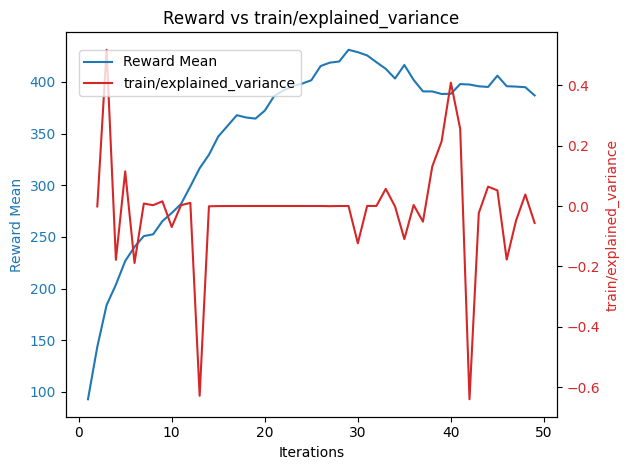

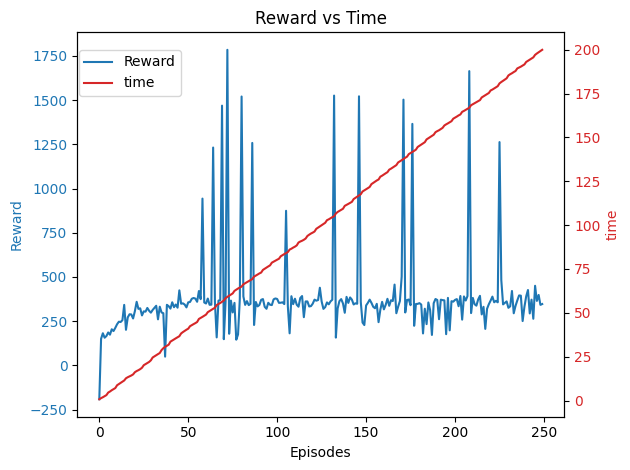

In [27]:
train_data_log: DataFrame = pd.read_csv(tmp_path+"progress.csv")
train_data_monitor: DataFrame = pd.read_csv(tmp_path+"monitor.csv", header=1)

# train_data_monitor = pd.concat([train_data_monitor] * 3, ignore_index=True)
print(train_data_log.columns.to_list())

fig, ax1 = plt.subplots()

iterations: Series[int] = train_data_log['time/iterations'].astype(int)


ax1.set_xlabel('Iterations')
color = 'tab:blue'
ax1.set_ylabel('Reward Mean', color=color)
ax1.plot(iterations,
         train_data_log['rollout/ep_rew_mean'], color=color, label='Reward Mean')
ax1.tick_params(axis='y', labelcolor=color)


col = 'train/explained_variance'

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(col, color=color)
ax2.plot(iterations, train_data_log[col], color=color, label=col)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_title('Reward vs ' + col)


fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()


fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
ax1.set_ylabel('Reward', color=color)
ax1.plot(episodes, train_data_monitor['r'], color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Reward vs Time')


ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('time', color=color)
ax2.plot(episodes, train_data_monitor['t'], color=color, label='time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

## Comprobación funcionamiento


In [28]:
seed = None
env = make(env_id, seed=seed)
model = PPO.load(name, print_system_info=True)
print(type(env))
num_steps = 1
obs, _ = env.reset()
# Variables de información:
acciones = []
rewards = []
ocu = []
tams = []
num = []
lim_ocu = 0
a2 = []

# -------------------------

_states = None
ant = env._get_info()
for episode in range(num_steps):

    done = False
    step_counter = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, terminated, info = env.step(action)
        if len(ant) > 0 and ant != info:
            print(info["Stats"])
        ant = info

        ocu.append(info["Stats"]["OcupacionActual"])
        lim_ocu = info["Stats"]["LimiteOcupación"]
        tams.append(info["Stats"]["TamañoTotal"])
        num.append(info["Stats"]["NumPaquetes"])
        a2.append(info["Stats"]["Action"])

        rewards.append(reward)
        acciones.append(action.item())

        done: bool = done or terminated

    env.reset(seed=seed)
    step_counter += 1

# Debug
print(f"Acciones: {acciones}")
print(list(map(lambda x: Acciones.int_to_action(x), acciones)))
print(list(map(lambda x: int(round(x, 0)), rewards)))
print(a2)

== CURRENT SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

== SAVED MODEL SYSTEM INFO ==
- OS: Windows-10-10.0.19045-SP0 10.0.19045
- Python: 3.12.6
- Stable-Baselines3: 2.4.1
- PyTorch: 2.5.1+cpu
- GPU Enabled: False
- Numpy: 1.26.4
- Cloudpickle: 3.1.0
- Gymnasium: 1.0.0

<class 'custom_env.router_env.RouterEnv'>
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 0, 'TamañoTotal': 0.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.0, 'LimiteOcupación': 0.8}
{'EstadoMaquina': 'EstadoAtaque', 'NumPaquetes': 10, 'TamañoTotal': 13083.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.04, 'LimiteOcupación': 0.8}
{'EstadoMaquina': 'EstadoNormal', 'NumPaquetes': 20, 'TamañoTotal': 26192.0, 'Action': <Acciones.PERMITIR: 1>, 'OcupacionActual': 0.08, 'LimiteOcupación': 0.8}
{'EstadoMaquina': 'EstadoNormal', 'NumPaquetes': 19, 'Ta

In [29]:
assert len(acciones) != a2.count(Acciones.DENEGAR)
assert len(acciones) != a2.count(Acciones.PERMITIR)

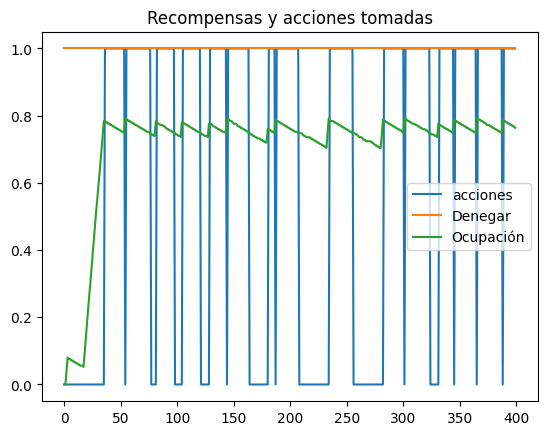

Rewards:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, -0.2, -0.30000000000000004, -0.4, -0.5, -0.6000000000000001, -0.7000000000000001, -0.8, -0.9, -1.0, -1.1, -1.2000000000000002, -1.3, -1.4000000000000001, -1.5, -1.6, -1.7000000000000002, -1.8, 1.0, -0.1, -0.2, -0.30000000000000004, -0.4, -0.5, -0.6000000000000001, -0.7000000000000001, -0.8, -0.9, -1.0, -1.1, -1.2000000000000002, -1.3, -1.4000000000000001, -1.5, -1.6, -1.7000000000000002, -1.8, -1.9000000000000001, -2.0, -2.1, -2.2, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, -0.2, -0.30000000000000004, -0.4, -0.5, -0.6000000000000001, -0.7000000000000001, -0.8, -0.9, -1.0, -1.1, -1.2000000000000002, -1.3, -1.4000000000000001, -1.5, -1.6, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -0.1, -0.2, -0.30000000000000004, -0.4, -0.5, -0.6000000000000001, -0.7000000000000001, -0.8, -0.9, -1.0, -1.1, -1.2000000000000002, -1

In [30]:
assert len(acciones) == len(rewards)
# plt.plot(rewards, label="rewards")
plt.plot(acciones, label="acciones")

plt.plot([Acciones.action_to_int(Acciones.DENEGAR)]
         * len(acciones), label="Denegar")
plt.plot(ocu, label="Ocupación")
plt.title("Recompensas y acciones tomadas")

plt.legend()
plt.show()
print("Rewards: ", rewards)
num_permitidos = acciones.count(Acciones.action_to_int(Acciones.PERMITIR))
print(num_permitidos, len(acciones)-num_permitidos, "",
      num_permitidos/len(acciones), 1-num_permitidos/len(acciones))

Ocupación:  [0.0, 0.0, 0.04, 0.08, 0.076, 0.076, 0.072, 0.072, 0.068, 0.068, 0.064, 0.064, 0.06, 0.06, 0.056, 0.056, 0.056, 0.052, 0.092, 0.136, 0.176, 0.22, 0.26, 0.3, 0.34, 0.384, 0.424, 0.464, 0.508, 0.544, 0.584, 0.62, 0.66, 0.7, 0.744, 0.784, 0.784, 0.78, 0.78, 0.776, 0.776, 0.772, 0.772, 0.768, 0.768, 0.764, 0.764, 0.76, 0.76, 0.756, 0.756, 0.752, 0.752, 0.748, 0.792, 0.788, 0.788, 0.784, 0.784, 0.78, 0.78, 0.776, 0.776, 0.772, 0.772, 0.768, 0.768, 0.764, 0.764, 0.76, 0.76, 0.756, 0.756, 0.752, 0.752, 0.752, 0.748, 0.744, 0.744, 0.74, 0.74, 0.784, 0.78, 0.776, 0.776, 0.772, 0.772, 0.772, 0.768, 0.768, 0.764, 0.76, 0.76, 0.756, 0.756, 0.752, 0.752, 0.748, 0.748, 0.744, 0.744, 0.74, 0.74, 0.736, 0.78, 0.78, 0.776, 0.776, 0.772, 0.772, 0.768, 0.768, 0.764, 0.764, 0.76, 0.76, 0.756, 0.756, 0.752, 0.752, 0.748, 0.748, 0.744, 0.744, 0.74, 0.74, 0.74, 0.736, 0.776, 0.776, 0.776, 0.772, 0.768, 0.768, 0.764, 0.764, 0.76, 0.76, 0.756, 0.756, 0.752, 0.752, 0.752, 0.748, 0.792, 0.788, 0.788,

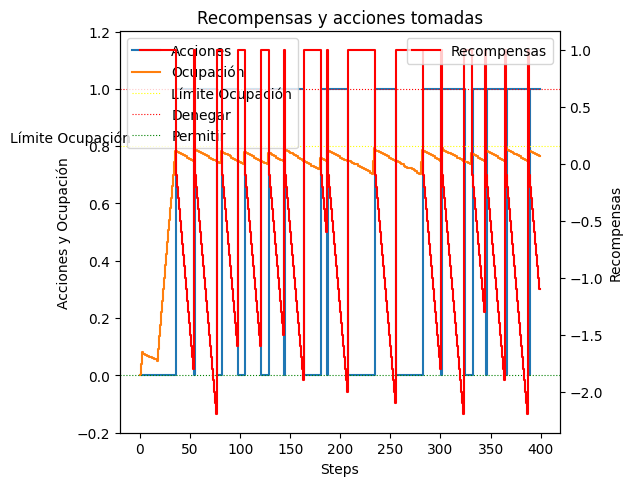

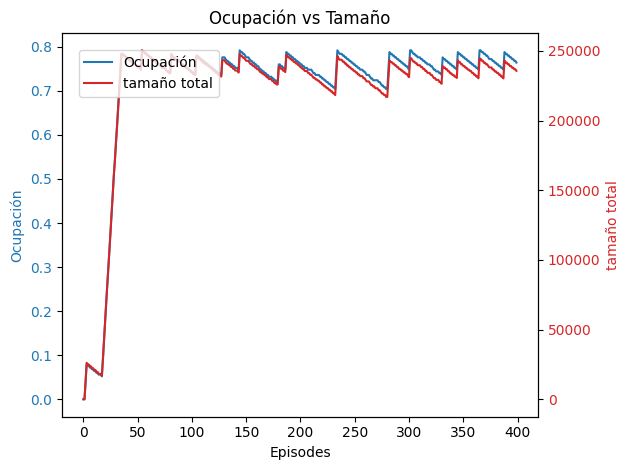

La ocupación máxima es de 79%
La ocupación mínima es de 0%


In [31]:
print("Ocupación: ", ocu)
fig, ax1 = plt.subplots()

# Configurar el eje X e Y
ax1.set_xlabel('Steps')
ax1.set_ylabel('Acciones y Ocupación')

# Graficar las acciones y la ocupación
ax1.step(range(len(acciones)), acciones, label="Acciones", where='post')
# ax1.step(range(len(acciones)), [1] * len(acciones), label="Denegar", where='mid')  # Ajustar según tus datos
ax1.step(range(len(ocu)), ocu, label="Ocupación", where='mid')

# Crear línea horizontal en el gráfico
ax1.axhline(y=lim_ocu, color='yellow', linestyle='dotted',
            linewidth=0.8, label='Límite Ocupación')

# Agregar marca en el eje Y
ticks = list(ax1.get_yticks())  # Obtener los ticks actuales
if lim_ocu not in ticks:
    ticks.append(lim_ocu)  # Agregar el límite de ocupación a los ticks
ax1.set_yticks(sorted(ticks))  # Actualizar los ticks

# Anotar el límite en el eje
ax1.annotate(
    'Límite Ocupación',
    xy=(-0.1, lim_ocu),  # Coordenada en el eje Y
    xytext=(-50, lim_ocu + 5),
    textcoords='offset points',
    fontsize=10, color='black',
    ha='center',
    va='center'
)
ax1.axhline(y=Acciones.action_to_int(Acciones.DENEGAR), color='red',
            linestyle='dotted', linewidth=0.8, label='Denegar')
ax1.axhline(y=Acciones.action_to_int(Acciones.PERMITIR),
            color='green', linestyle='dotted', linewidth=0.8, label='Permitir')


# Leyenda del primer eje
ax1.legend(loc='upper left')

# Crear segundo eje Y para las recompensas
ax2 = ax1.twinx()
ax2.set_ylabel('Recompensas')
ax2.step(range(len(rewards)), rewards,
         label="Recompensas", where='mid', color='r')

# Leyenda del segundo eje
ax2.legend(loc='upper right')

# Ajustar diseño y mostrar título
fig.tight_layout()
plt.title("Recompensas y acciones tomadas")
plt.show()


tam = [x/1 for x in tams]


"""
plt.step(range(len(acciones)), acciones, label="acciones", where='mid')
plt.step(range(len(acciones)), [Acciones.action_to_int(Acciones.DENEGAR)]*len(acciones), label="Denegar", where='mid')
plt.plot([lim_ocu]*len(ocu), label="LimiteOcupación")
"""

fig, ax1 = plt.subplots()

episodes = range(len(train_data_monitor['l']))

# Plot rollout/ep_rew_mean on the first y-axis
ax1.set_xlabel('Episodes')
color = 'tab:blue'
label = 'Ocupación'
ax1.set_ylabel(label, color=color)
ax1.plot(range(len(ocu)), ocu, color=color, label=label)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Ocupación vs Tamaño')


ax2 = ax1.twinx()
color = 'tab:red'
label = 'tamaño total'
ax2.set_ylabel(label, color=color)
ax2.plot(range(len(tams)), tam, color=color, label=label)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.9))

plt.show()

"""plt.step(range(len(ocu)),ocu, label="Ocupación",where='mid')
plt.step(range(len(tams)),tam, label="Tamaño",where='mid')


plt.title("Recompensas y acciones tomadas")
plt.legend()
plt.show()"""
print(f"La ocupación máxima es de {np.max(ocu):.0%}")
print(f"La ocupación mínima es de {np.min(ocu):.0%}")

## Pruebas:


In [32]:
print(f"Tiempo medio: {tiempo_global/iteraciones if abs(iteraciones) > 1e-5 else 0:.2f} micro-segundos de {iteraciones} iteraciones")

Tiempo medio: 0.00 micro-segundos de 0 iteraciones


In [33]:
print(Acciones.action_to_int(Acciones.PERMITIR))
print(Acciones.action_to_int(Acciones.DENEGAR))

0
1


['EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoNormal', 'EstadoNormal', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'EstadoAtaque', 'Estado

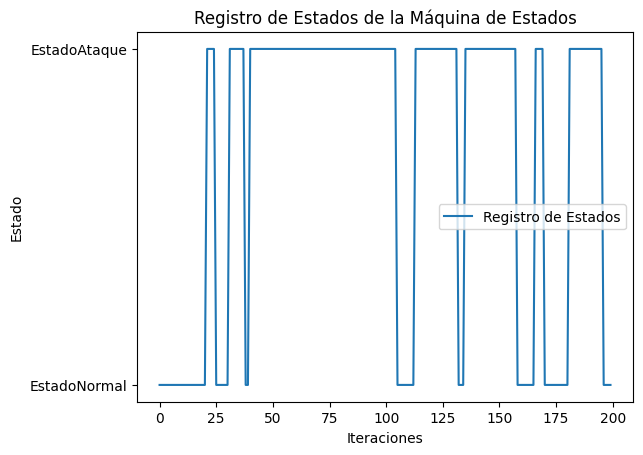

In [34]:
from custom_env.states import *
maquina = MaquinaDeEstados()
for _ in range(200):
    maquina.cambiar_estado()
print(maquina.registro_estados)

plt.plot(maquina.registro_estados, label="Registro de Estados")
plt.xlabel("Iteraciones")
plt.ylabel("Estado")
plt.title("Registro de Estados de la Máquina de Estados")
plt.legend()
plt.show()

In [35]:
# Lista de ejemplo
lista: list[str] = [x.__name__ for x in maquina.estados_posibles]
combinaciones_con_repeticion = list(product(lista, repeat=2))
dict_con: dict[tuple[str, str], int] = {
    x: 0 for x in combinaciones_con_repeticion}

print(dict_con)
duracion_ataques = []
estado_Ant = maquina.registro_estados[0]

for estado in maquina.registro_estados[1:]:
    dict_con[(estado_Ant, estado)] += 1

    if (estado_Ant, estado) == (EstadoNormal.__name__, EstadoAtaque.__name__):  # Empieza ataque
        duracion_ataques.append(1)
    elif (estado_Ant, estado) == (EstadoAtaque.__name__, EstadoAtaque.__name__):  # Sigue ataque
        if len(duracion_ataques) > 0:
            duracion_ataques[-1] += 1

    estado_Ant: Estado = estado

print(
    f"Como promedio los {len(duracion_ataques)} ataques duran {np.mean(duracion_ataques):.1f} iteraciones.")
print("Duracion 5 primeros ataques: ", duracion_ataques[:5], "...")
try:
    for estado1 in lista:
        total = 0
        for estado2 in lista:
            total += dict_con[(estado1, estado2)]
        print(f"Estando en {estado1}:")
        for estado2 in lista:
            print(f"De {estado1} a {estado2}: {
                dict_con[(estado1, estado2)] / total:6.2%}")
except:
    pass

{('EstadoNormal', 'EstadoNormal'): 0, ('EstadoNormal', 'EstadoAtaque'): 0, ('EstadoAtaque', 'EstadoNormal'): 0, ('EstadoAtaque', 'EstadoAtaque'): 0}
Como promedio los 7 ataques duran 19.6 iteraciones.
Duracion 5 primeros ataques:  [4, 7, 65, 19, 23] ...
Estando en EstadoNormal:
De EstadoNormal a EstadoNormal: 88.71%
De EstadoNormal a EstadoAtaque: 11.29%
Estando en EstadoAtaque:
De EstadoAtaque a EstadoNormal:  5.11%
De EstadoAtaque a EstadoAtaque: 94.89%


In [36]:
_np_random, _ = seeding.np_random(None)
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=True))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
pak = []
for _ in range(1000):
    pak.append(_np_random.integers(1, 10, endpoint=False))

print(f"{np.min(pak)},{np.max(pak)},{np.mean(pak):.0f},{np.std(pak):.0f}")
print(type(0.0), type(0))
print(int(0.2))

1,10,5,3
1,9,5,3
<class 'float'> <class 'int'>
0
